# Importing Library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import classification_report

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Loading Dataset

In [ ]:
df = pd.read_csv("/content/mushrooms.csv")
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Getting to know if any column is having a single vlaue

In [ ]:
# There is a column called "veil-type" that contains only one category. Although it can be dropped, I have decided to keep it since the dataset is relatively small.
for col in df.columns:
 print(df[col].value_counts())
 print("------")

e    4208
p    3916
Name: class, dtype: int64
------
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
------
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
------
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
------
f    4748
t    3376
Name: bruises, dtype: int64
------
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
------
f    7914
a     210
Name: gill-attachment, dtype: int64
------
c    6812
w    1312
Name: gill-spacing, dtype: int64
------
b    5612
n    2512
Name: gill-size, dtype: int64
------
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
------
t    4608
e    3516
Name: stalk-shape, dtype: int64
------
b    3776
?    2480
e    1120
c     556
r     192
Name: stal

# Encoding all the Input features  

In [ ]:
OE = OrdinalEncoder()
X = OE.fit_transform(df.iloc[:,1:])
X

array([[5., 2., 4., ..., 2., 3., 5.],
       [5., 2., 9., ..., 3., 2., 1.],
       [0., 2., 8., ..., 3., 2., 3.],
       ...,
       [2., 2., 4., ..., 0., 1., 2.],
       [3., 3., 4., ..., 7., 4., 2.],
       [5., 2., 4., ..., 4., 1., 2.]])

# Encoding target feature

In [ ]:
LE = LabelEncoder()
Y = LE.fit_transform(df['class'])
Y

array([1, 0, 0, ..., 0, 1, 0])

# Splitting the data into Training Set , Testing Set & Validation Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.1,random_state=1)

# Creating an object of early stopping to save the resources

In [ ]:
ES = EarlyStopping(monitor='val_loss',mode='min',patience=8)

In [ ]:
# obj of Sequential
ann = Sequential()

# adding input/hidden/dropout layers
ann.add(Dense(8,activation='relu'))
ann.add(Dropout(0.6))

ann.add(Dense(6,activation='relu'))
ann.add(Dropout(0.4))

# Output layers
ann.add(Dense(1,activation='sigmoid'))

# compiling the model
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# fitting the model
ann.fit(X_train, Y_train, batch_size = 15, epochs = 200,callbacks=ES,validation_data=(X_val,Y_val))

Epoch 1/200
390/390 [==============================] - 2s 3ms/step - loss: 0.8419 - accuracy: 0.5396 - val_loss: 0.6366 - val_accuracy: 0.7169
Epoch 2/200
390/390 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.5902 - val_loss: 0.5907 - val_accuracy: 0.7431
Epoch 3/200
390/390 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.6439 - val_loss: 0.5137 - val_accuracy: 0.7769
Epoch 4/200
390/390 [==============================] - 1s 2ms/step - loss: 0.5595 - accuracy: 0.6798 - val_loss: 0.4654 - val_accuracy: 0.8200
Epoch 5/200
390/390 [==============================] - 1s 3ms/step - loss: 0.5397 - accuracy: 0.6919 - val_loss: 0.4307 - val_accuracy: 0.8569
Epoch 6/200
390/390 [==============================] - 1s 3ms/step - loss: 0.5019 - accuracy: 0.7343 - val_loss: 0.3573 - val_accuracy: 0.8846
Epoch 7/200
390/390 [==============================] - 1s 2ms/step - loss: 0.4638 - accuracy: 0.7600 - val_loss: 0.3138 - val_accuracy: 0.8985

# Visualization of Loss/Accuracy w.r.t Epochs

<AxesSubplot:>

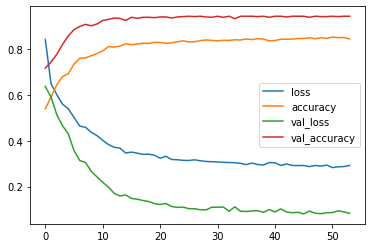

In [ ]:
  # as the loss and accuracy goes parallely they will take muchmore time to converge with each other 
  lossdf = pd.DataFrame(ann.history.history)
  lossdf.plot()

In [ ]:
Y_pred = ann.predict(X_test)

51/51 [==============================] - 0s 2ms/step


In [ ]:
Y_pred

array([[4.36508708e-05],
       [9.79568183e-01],
       [9.98299718e-01],
       ...,
       [1.00000000e+00],
       [1.13329556e-07],
       [1.44340023e-02]], dtype=float32)

In [ ]:
Y_pred = np.where(Y_pred>0.5,1,0)

# Classification report

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       820
           1       1.00      0.91      0.95       805

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.95      0.95      1625

